<a href="https://colab.research.google.com/github/yellow-seed/aiit-machine-learning/blob/main/report2_original_c10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import datasets
from tensorflow.keras import utils

課題2 fileラベル
授業の例を基本形としてパラメータを一つずつ変更してみて変化について評価する

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000, 1)


In [ ]:
x_train=x_train/255 # 255で割るのはrgbの正規化
x_test=x_test/255
y_train=utils.to_categorical(y_train,10)
y_test=utils.to_categorical(y_test,10)

####################### ここまで共通 ###################################

####################### 比較の基準となるモデル###################################

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1250/1250 [==============================] - 16s 5ms/step - loss: 1.5981 - acc: 0.4151 - val_loss: 1.1998 - val_acc: 0.5687
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1533 - acc: 0.5883 - val_loss: 0.9554 - val_acc: 0.6620
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9771 - acc: 0.6548 - val_loss: 0.9077 - val_acc: 0.6821
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8794 - acc: 0.6883 - val_loss: 0.8086 - val_acc: 0.7200
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7992 - acc: 0.7161 - val_loss: 0.7565 - val_acc: 0.7359
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7398 - acc: 0.7408 - val_loss: 0.7442 - val_acc: 0.7448
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7003 - acc: 0.7525 - val_loss: 0.6959 - val_acc: 0.7584
Epoch 8/20
1250/1250 [==============================] - 5s 4m

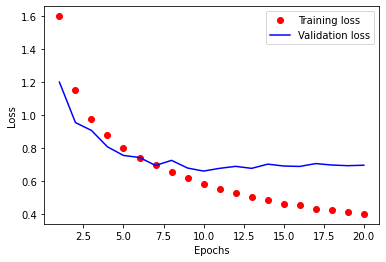

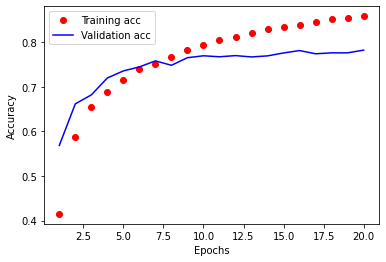

313/313 [==============================] - 1s 3ms/step - loss: 0.7252 - acc: 0.7782
[0.7252444624900818, 0.7781999707221985]
CPU times: user 2min 28s, sys: 21 s, total: 2min 48s
Wall time: 1min 58s


In [ ]:
%%time
model = models.Sequential()
model.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.25))

model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model.summary()

history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model.evaluate(x_test, y_test))

色々と設定条件を変えてみる

方針として



1.   Conv2Dのパラメータ変更(filters, kernel_size, strides, padding)
* filters=48, filters=64
* kernel_size=(6,6), kernel_size=(9,9)
* strides=(3,3), strides=(5,5)

1.   学習パラメータ変更(epoch数, batch_size, validation_splitの変更)
* epoch=100, 1000, 10000
* batch_size=48, 64
* validation_split=0.4, 0.6

1.   層の数をより増やす(+1, +2, +3)

1. optimizerの変更(lrについては同じ値とする)
*   SGD
*   Adagrad
*.  RMSprop






Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 48)        1344      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 48)        20784     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 48)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 48)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 48)        20784     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 48)        20784     
                                                      

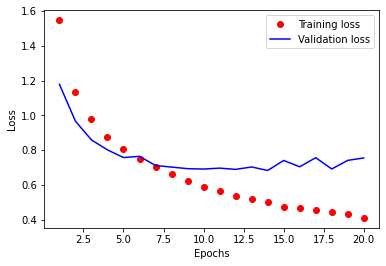

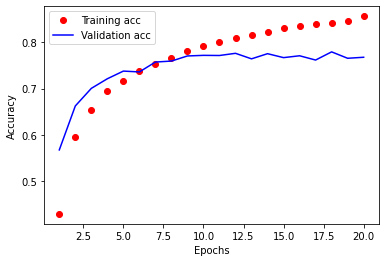

313/313 [==============================] - 1s 3ms/step - loss: 0.7718 - acc: 0.7658
[0.7718155384063721, 0.7657999992370605]
CPU times: user 2min 25s, sys: 20.3 s, total: 2min 45s
Wall time: 1min 48s


In [ ]:
%%time
conv2D_filter_48_model = models.Sequential()
conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(layers.MaxPooling2D(pool_size=(2,2)))

conv2D_filter_48_model.add(layers.Dropout(0.25))

conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(
    layers.Conv2D(
        filters=48,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_48_model.add(layers.MaxPooling2D(pool_size=(2,2)))
conv2D_filter_48_model.add(layers.Dropout(0.25))

conv2D_filter_48_model.add(layers.Flatten())
conv2D_filter_48_model.add(layers.Dense(units=512, activation='relu'))
conv2D_filter_48_model.add(layers.Dropout(0.5))
conv2D_filter_48_model.add(layers.Dense(units=10, activation='softmax'))

conv2D_filter_48_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

conv2D_filter_48_model.summary()

history=conv2D_filter_48_model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(conv2D_filter_48_model.evaluate(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

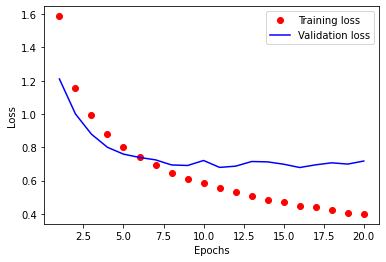

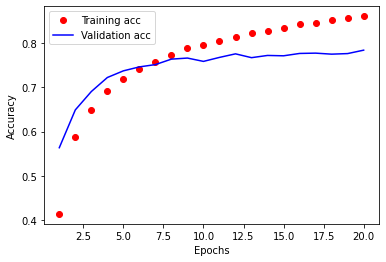

313/313 [==============================] - 1s 3ms/step - loss: 0.7568 - acc: 0.7756
[0.7568411231040955, 0.775600016117096]
CPU times: user 2min 28s, sys: 19.6 s, total: 2min 47s
Wall time: 1min 50s


In [ ]:
%%time
conv2D_filter_64_model = models.Sequential()
conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(layers.MaxPooling2D(pool_size=(2,2)))

conv2D_filter_64_model.add(layers.Dropout(0.25))

conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

conv2D_filter_64_model.add(layers.MaxPooling2D(pool_size=(2,2)))
conv2D_filter_64_model.add(layers.Dropout(0.25))

conv2D_filter_64_model.add(layers.Flatten())
conv2D_filter_64_model.add(layers.Dense(units=512, activation='relu'))
conv2D_filter_64_model.add(layers.Dropout(0.5))
conv2D_filter_64_model.add(layers.Dense(units=10, activation='softmax'))

conv2D_filter_64_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

conv2D_filter_64_model.summary()

history=conv2D_filter_64_model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(conv2D_filter_64_model.evaluate(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        3488      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        36896     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        73792     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        147520    
                                                      

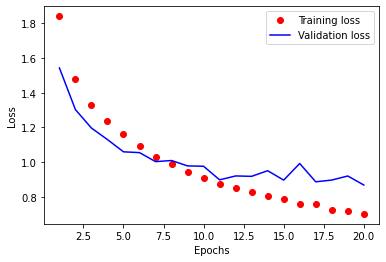

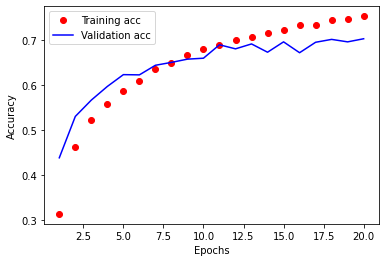

313/313 [==============================] - 1s 3ms/step - loss: 0.8927 - acc: 0.7003
[0.8927101492881775, 0.7002999782562256]
CPU times: user 2min 36s, sys: 19.8 s, total: 2min 55s
Wall time: 1min 58s


In [ ]:
%%time
model_kernel_66 = models.Sequential()
model_kernel_66.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(layers.MaxPooling2D(pool_size=(2,2)))

model_kernel_66.add(layers.Dropout(0.25))

model_kernel_66.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(6,6),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_66.add(layers.MaxPooling2D(pool_size=(2,2)))
model_kernel_66.add(layers.Dropout(0.25))

model_kernel_66.add(layers.Flatten())
model_kernel_66.add(layers.Dense(units=512, activation='relu'))
model_kernel_66.add(layers.Dropout(0.5))
model_kernel_66.add(layers.Dense(units=10, activation='softmax'))

model_kernel_66.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_kernel_66.summary()

history=model_kernel_66.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_kernel_66.evaluate(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        7808      
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        82976     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        165952    
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        331840    
                                                      

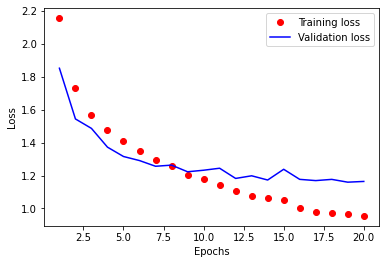

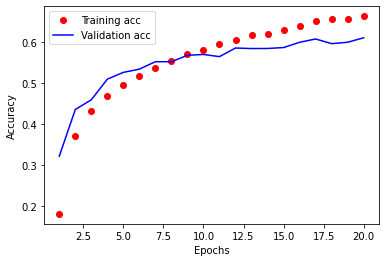

313/313 [==============================] - 1s 3ms/step - loss: 1.1790 - acc: 0.6061
[1.1789547204971313, 0.6061000227928162]
CPU times: user 2min 34s, sys: 19.9 s, total: 2min 54s
Wall time: 1min 56s


In [ ]:
%%time
model_kernel_99 = models.Sequential()
model_kernel_99.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(layers.MaxPooling2D(pool_size=(2,2)))

model_kernel_99.add(layers.Dropout(0.25))

model_kernel_99.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(9,9),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_kernel_99.add(layers.MaxPooling2D(pool_size=(2,2)))
model_kernel_99.add(layers.Dropout(0.25))

model_kernel_99.add(layers.Flatten())
model_kernel_99.add(layers.Dense(units=512, activation='relu'))
model_kernel_99.add(layers.Dropout(0.5))
model_kernel_99.add(layers.Dense(units=10, activation='softmax'))

model_kernel_99.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_kernel_99.summary()

history=model_kernel_99.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_kernel_99.evaluate(x_test, y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 11, 11, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 2, 2, 32)          0         
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 64)          36928     
                                                      

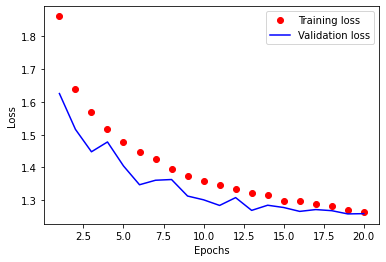

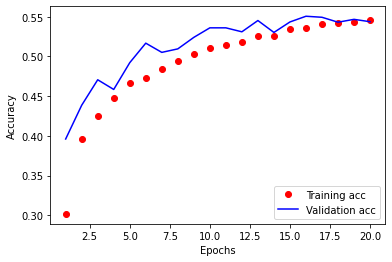

313/313 [==============================] - 1s 2ms/step - loss: 1.2426 - acc: 0.5506
[1.242613434791565, 0.550599992275238]
CPU times: user 2min 14s, sys: 19.3 s, total: 2min 33s
Wall time: 1min 38s


In [ ]:
%%time
model_strides_33 = models.Sequential()
model_strides_33.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(3,3),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(3,3),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(layers.MaxPooling2D(pool_size=(2,2)))

model_strides_33.add(layers.Dropout(0.25))

model_strides_33.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_strides_33.add(layers.MaxPooling2D(pool_size=(2,2)))
model_strides_33.add(layers.Dropout(0.25))

model_strides_33.add(layers.Flatten())
model_strides_33.add(layers.Dense(units=512, activation='relu'))
model_strides_33.add(layers.Dropout(0.5))
model_strides_33.add(layers.Dense(units=10, activation='softmax'))

model_strides_33.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_strides_33.summary()

history=model_strides_33.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_strides_33.evaluate(x_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

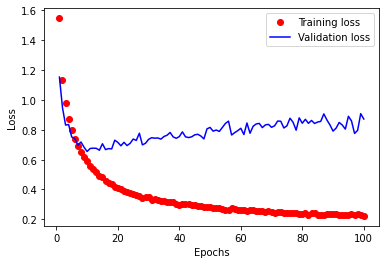

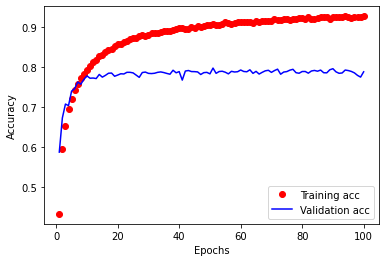

313/313 [==============================] - 1s 3ms/step - loss: 0.9156 - acc: 0.7807
[0.9156236052513123, 0.7807000279426575]
CPU times: user 11min 54s, sys: 1min 37s, total: 13min 32s
Wall time: 8min 47s


In [ ]:
%%time
model_epoch_100 = models.Sequential()
model_epoch_100.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(layers.MaxPooling2D(pool_size=(2,2)))

model_epoch_100.add(layers.Dropout(0.25))

model_epoch_100.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_100.add(layers.MaxPooling2D(pool_size=(2,2)))
model_epoch_100.add(layers.Dropout(0.25))

model_epoch_100.add(layers.Flatten())
model_epoch_100.add(layers.Dense(units=512, activation='relu'))
model_epoch_100.add(layers.Dropout(0.5))
model_epoch_100.add(layers.Dense(units=10, activation='softmax'))

model_epoch_100.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_epoch_100.summary()

history=model_epoch_100.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_epoch_100.evaluate(x_test, y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

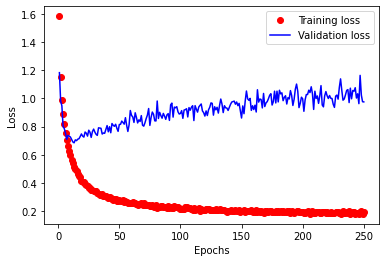

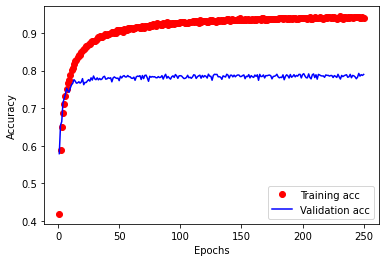

313/313 [==============================] - 1s 3ms/step - loss: 1.0178 - acc: 0.7827
[1.0177706480026245, 0.7827000021934509]
CPU times: user 29min 44s, sys: 4min 4s, total: 33min 48s
Wall time: 21min 54s


In [ ]:
%%time
model_epoch_250 = models.Sequential()
model_epoch_250.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(layers.MaxPooling2D(pool_size=(2,2)))

model_epoch_250.add(layers.Dropout(0.25))

model_epoch_250.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_epoch_250.add(layers.MaxPooling2D(pool_size=(2,2)))
model_epoch_250.add(layers.Dropout(0.25))

model_epoch_250.add(layers.Flatten())
model_epoch_250.add(layers.Dense(units=512, activation='relu'))
model_epoch_250.add(layers.Dropout(0.5))
model_epoch_250.add(layers.Dense(units=10, activation='softmax'))

model_epoch_250.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_epoch_250.summary()

history=model_epoch_250.fit(x_train,y_train,epochs=250,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_epoch_250.evaluate(x_test, y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

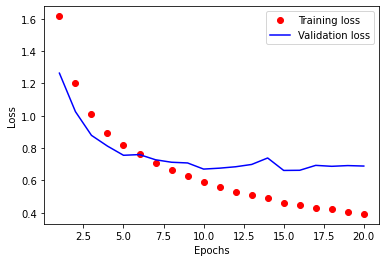

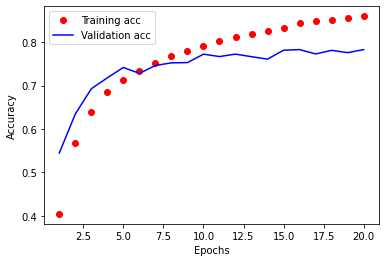

313/313 [==============================] - 1s 3ms/step - loss: 0.7285 - acc: 0.7785
[0.7284973859786987, 0.7785000205039978]
CPU times: user 1min 51s, sys: 14.7 s, total: 2min 6s
Wall time: 1min 21s


In [ ]:
%%time
model_batchsize_48 = models.Sequential()
model_batchsize_48.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(layers.MaxPooling2D(pool_size=(2,2)))

model_batchsize_48.add(layers.Dropout(0.25))

model_batchsize_48.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_48.add(layers.MaxPooling2D(pool_size=(2,2)))
model_batchsize_48.add(layers.Dropout(0.25))

model_batchsize_48.add(layers.Flatten())
model_batchsize_48.add(layers.Dense(units=512, activation='relu'))
model_batchsize_48.add(layers.Dropout(0.5))
model_batchsize_48.add(layers.Dense(units=10, activation='softmax'))

model_batchsize_48.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_batchsize_48.summary()

history=model_batchsize_48.fit(x_train,y_train,epochs=20,batch_size=48,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_batchsize_48.evaluate(x_test, y_test))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

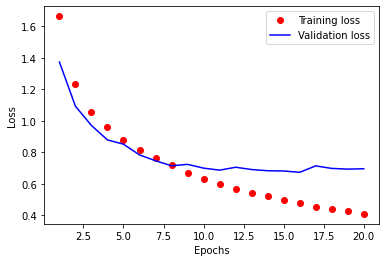

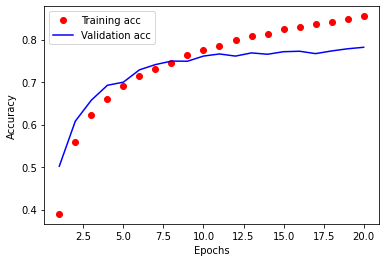

313/313 [==============================] - 1s 3ms/step - loss: 0.7103 - acc: 0.7758
[0.7102574110031128, 0.7757999897003174]
CPU times: user 1min 18s, sys: 9.42 s, total: 1min 27s
Wall time: 58.2 s


In [ ]:
%%time
model_batchsize_64 = models.Sequential()
model_batchsize_64.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(layers.MaxPooling2D(pool_size=(2,2)))

model_batchsize_64.add(layers.Dropout(0.25))

model_batchsize_64.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_batchsize_64.add(layers.MaxPooling2D(pool_size=(2,2)))
model_batchsize_64.add(layers.Dropout(0.25))

model_batchsize_64.add(layers.Flatten())
model_batchsize_64.add(layers.Dense(units=512, activation='relu'))
model_batchsize_64.add(layers.Dropout(0.5))
model_batchsize_64.add(layers.Dense(units=10, activation='softmax'))

model_batchsize_64.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_batchsize_64.summary()

history=model_batchsize_64.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_batchsize_64.evaluate(x_test, y_test))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

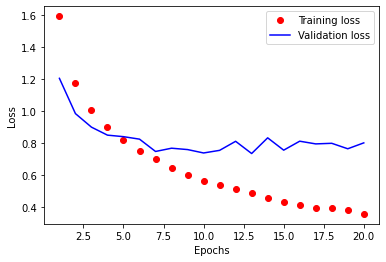

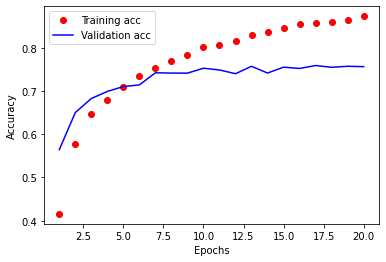

313/313 [==============================] - 1s 3ms/step - loss: 0.8216 - acc: 0.7497
[0.8215826153755188, 0.7497000098228455]
CPU times: user 2min 18s, sys: 18.9 s, total: 2min 36s
Wall time: 1min 41s


In [ ]:
%%time
model_validation_split04 = models.Sequential()
model_validation_split04.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(layers.MaxPooling2D(pool_size=(2,2)))

model_validation_split04.add(layers.Dropout(0.25))

model_validation_split04.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split04.add(layers.MaxPooling2D(pool_size=(2,2)))
model_validation_split04.add(layers.Dropout(0.25))

model_validation_split04.add(layers.Flatten())
model_validation_split04.add(layers.Dense(units=512, activation='relu'))
model_validation_split04.add(layers.Dropout(0.5))
model_validation_split04.add(layers.Dense(units=10, activation='softmax'))

model_validation_split04.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_validation_split04.summary()

history=model_validation_split04.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.4)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_validation_split04.evaluate(x_test, y_test))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

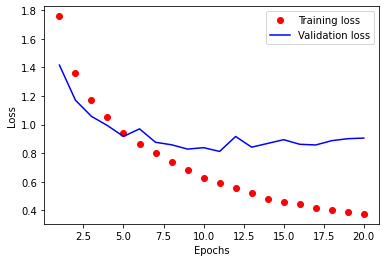

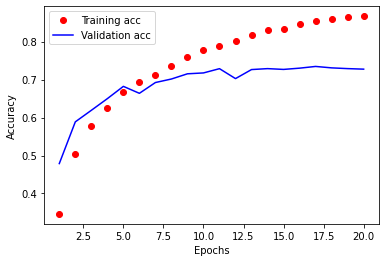

313/313 [==============================] - 1s 3ms/step - loss: 0.9160 - acc: 0.7212
[0.9159892797470093, 0.7211999893188477]
CPU times: user 2min 2s, sys: 19.5 s, total: 2min 22s
Wall time: 1min 28s


In [ ]:
%%time
model_validation_split06 = models.Sequential()
model_validation_split06.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(layers.MaxPooling2D(pool_size=(2,2)))

model_validation_split06.add(layers.Dropout(0.25))

model_validation_split06.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_validation_split06.add(layers.MaxPooling2D(pool_size=(2,2)))
model_validation_split06.add(layers.Dropout(0.25))

model_validation_split06.add(layers.Flatten())
model_validation_split06.add(layers.Dense(units=512, activation='relu'))
model_validation_split06.add(layers.Dropout(0.5))
model_validation_split06.add(layers.Dense(units=10, activation='softmax'))

model_validation_split06.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_validation_split06.summary()

history=model_validation_split06.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.6)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_validation_split06.evaluate(x_test, y_test))

# レイヤーの追加

方針


*   Conv2Dを追加した層
*   そこにプーリング層とドロップアウト層を追加



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 64)        18496     
                                                     

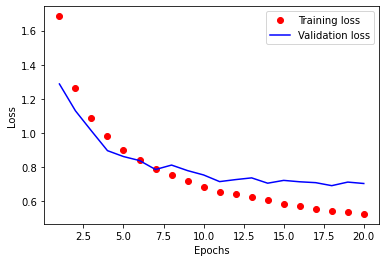

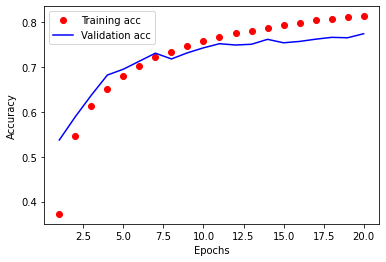

313/313 [==============================] - 1s 3ms/step - loss: 0.7216 - acc: 0.7651
[0.7215743660926819, 0.7651000022888184]
CPU times: user 2min 40s, sys: 19.2 s, total: 3min
Wall time: 2min 3s


In [ ]:
%%time
model_add_Conv2D_layer = models.Sequential()
model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(layers.MaxPooling2D(pool_size=(2,2)))

model_add_Conv2D_layer.add(layers.Dropout(0.25))

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_Conv2D_layer.add(layers.MaxPooling2D(pool_size=(2,2)))
model_add_Conv2D_layer.add(layers.Dropout(0.25))

model_add_Conv2D_layer.add(layers.Flatten())
model_add_Conv2D_layer.add(layers.Dense(units=512, activation='relu'))
model_add_Conv2D_layer.add(layers.Dropout(0.5))
model_add_Conv2D_layer.add(layers.Dense(units=10, activation='softmax'))

model_add_Conv2D_layer.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_add_Conv2D_layer.summary()

history=model_add_Conv2D_layer.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_add_Conv2D_layer.evaluate(x_test, y_test))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_56 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_57 (Conv2D)          (None, 16, 16, 64)        18496     
                                                     

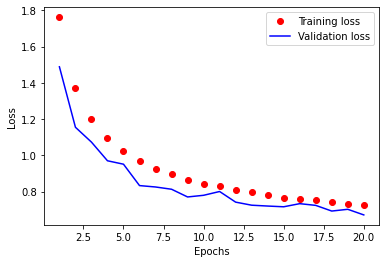

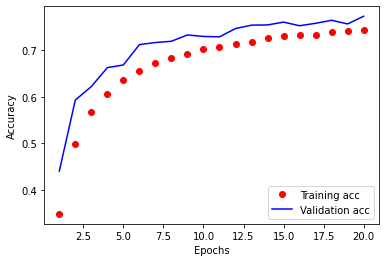

313/313 [==============================] - 1s 3ms/step - loss: 0.6926 - acc: 0.7643
[0.69256192445755, 0.7642999887466431]
CPU times: user 2min 45s, sys: 19.5 s, total: 3min 5s
Wall time: 2min 6s


In [ ]:
%%time
model_add_pooling_layer = models.Sequential()
model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(layers.MaxPooling2D(pool_size=(2,2)))

model_add_pooling_layer.add(layers.Dropout(0.25))

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_add_pooling_layer.add(layers.MaxPooling2D(pool_size=(2,2)))
model_add_pooling_layer.add(layers.Dropout(0.25))

model_add_pooling_layer.add(layers.MaxPooling2D(pool_size=(2,2)))
model_add_pooling_layer.add(layers.Dropout(0.25))

model_add_pooling_layer.add(layers.Flatten())
model_add_pooling_layer.add(layers.Dense(units=512, activation='relu'))
model_add_pooling_layer.add(layers.Dropout(0.5))
model_add_pooling_layer.add(layers.Dense(units=10, activation='softmax'))

model_add_pooling_layer.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['acc']
)

model_add_pooling_layer.summary()

history=model_add_pooling_layer.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_add_pooling_layer.evaluate(x_test, y_test))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_61 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_63 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.3006 - acc: 0.1084 - val_loss: 2.2887 - val_acc: 0.1663
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2749 - acc: 0.1449 - val_loss: 2.2381 - val_acc: 0.2157
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1696 - acc: 0.1944 - val_loss: 2.0584 - val_acc: 0.2664
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0562 - acc: 0.2330 - val_loss: 1.9970 - val_acc: 0.2852
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0110 - acc: 0.2592 - val_loss: 1.9570 - val_acc: 0.3027
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9726 - acc: 0.2797 - val_loss: 1.9303 - val_acc: 0.3188
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9407 - acc: 0.2947 - val_loss: 1.8890 - val_acc: 0.3310
Epoch 8/20
1250/1250 [==============================] - 5s 4ms

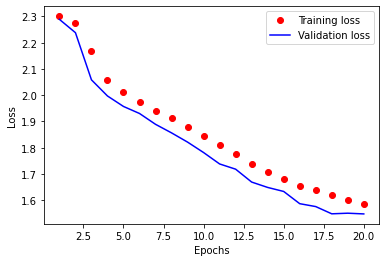

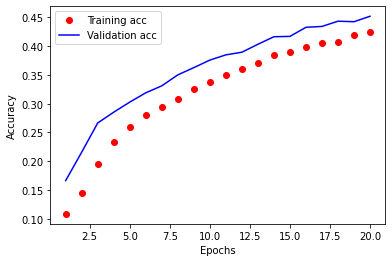

313/313 [==============================] - 1s 3ms/step - loss: 1.5260 - acc: 0.4575
[1.5260018110275269, 0.45750001072883606]
CPU times: user 2min 20s, sys: 19.3 s, total: 2min 39s
Wall time: 1min 44s


In [ ]:
%%time
model_optimizer_sgd = models.Sequential()
model_optimizer_sgd.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(layers.MaxPooling2D(pool_size=(2,2)))

model_optimizer_sgd.add(layers.Dropout(0.25))

model_optimizer_sgd.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_sgd.add(layers.MaxPooling2D(pool_size=(2,2)))
model_optimizer_sgd.add(layers.Dropout(0.25))

model_optimizer_sgd.add(layers.Flatten())
model_optimizer_sgd.add(layers.Dense(units=512, activation='relu'))
model_optimizer_sgd.add(layers.Dropout(0.5))
model_optimizer_sgd.add(layers.Dense(units=10, activation='softmax'))

model_optimizer_sgd.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.SGD(lr=0.001),
    metrics=['acc']
)

model_optimizer_sgd.summary()

history=model_optimizer_sgd.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_optimizer_sgd.evaluate(x_test, y_test))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_46 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_67 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adagrad.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2844 - acc: 0.1203 - val_loss: 2.2390 - val_acc: 0.1794
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1232 - acc: 0.2206 - val_loss: 1.9977 - val_acc: 0.2858
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9912 - acc: 0.2719 - val_loss: 1.9273 - val_acc: 0.3174
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9201 - acc: 0.3027 - val_loss: 1.8360 - val_acc: 0.3549
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8204 - acc: 0.3433 - val_loss: 1.7288 - val_acc: 0.3862
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7489 - acc: 0.3675 - val_loss: 1.6686 - val_acc: 0.4021
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7004 - acc: 0.3805 - val_loss: 1.6350 - val_acc: 0.4142
Epoch 8/20
1250/1250 [==============================] - 5s 4ms

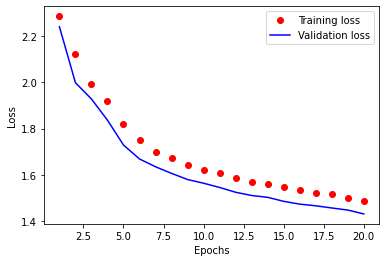

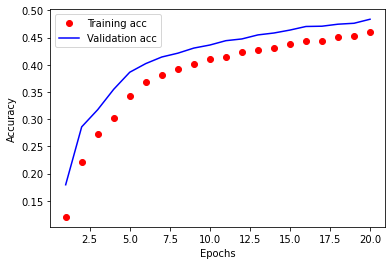

313/313 [==============================] - 1s 2ms/step - loss: 1.4163 - acc: 0.4880
[1.4162533283233643, 0.4880000054836273]
CPU times: user 2min 22s, sys: 19.1 s, total: 2min 42s
Wall time: 1min 46s


In [ ]:
%%time
model_optimizer_adagrad = models.Sequential()
model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(layers.MaxPooling2D(pool_size=(2,2)))

model_optimizer_adagrad.add(layers.Dropout(0.25))

model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_adagrad.add(layers.MaxPooling2D(pool_size=(2,2)))
model_optimizer_adagrad.add(layers.Dropout(0.25))

model_optimizer_adagrad.add(layers.Flatten())
model_optimizer_adagrad.add(layers.Dense(units=512, activation='relu'))
model_optimizer_adagrad.add(layers.Dropout(0.5))
model_optimizer_adagrad.add(layers.Dense(units=10, activation='softmax'))

model_optimizer_adagrad.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adagrad(lr=0.001),
    metrics=['acc']
)

model_optimizer_adagrad.summary()

history=model_optimizer_adagrad.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_optimizer_adagrad.evaluate(x_test, y_test))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_69 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_49 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_70 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_71 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5911 - acc: 0.4248 - val_loss: 1.3179 - val_acc: 0.5323
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1842 - acc: 0.5831 - val_loss: 1.0888 - val_acc: 0.6217
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0412 - acc: 0.6402 - val_loss: 0.9178 - val_acc: 0.6928
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9811 - acc: 0.6644 - val_loss: 0.9054 - val_acc: 0.6943
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9639 - acc: 0.6780 - val_loss: 0.9517 - val_acc: 0.6820
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9592 - acc: 0.6820 - val_loss: 1.0430 - val_acc: 0.6737
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9639 - acc: 0.6791 - val_loss: 0.9921 - val_acc: 0.6949
Epoch 8/20
1250/1250 [==============================] - 6s 5ms

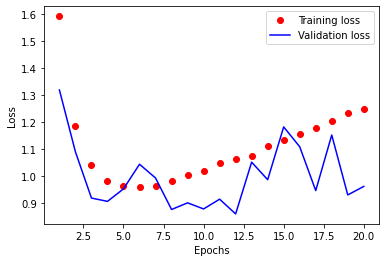

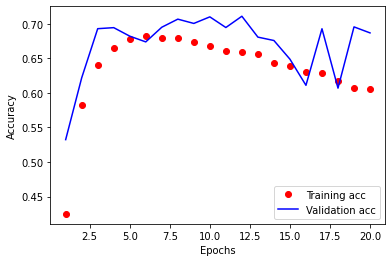

313/313 [==============================] - 1s 2ms/step - loss: 0.9802 - acc: 0.6861
[0.9801844954490662, 0.6861000061035156]
CPU times: user 2min 41s, sys: 20.4 s, total: 3min 2s
Wall time: 2min 2s


In [ ]:
%%time
model_optimizer_RMSprop = models.Sequential()
model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=32,
        input_shape=(32,32,3),
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(layers.MaxPooling2D(pool_size=(2,2)))

model_optimizer_RMSprop.add(layers.Dropout(0.25))

model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(
    layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        activation='relu'
    )
)

model_optimizer_RMSprop.add(layers.MaxPooling2D(pool_size=(2,2)))
model_optimizer_RMSprop.add(layers.Dropout(0.25))

model_optimizer_RMSprop.add(layers.Flatten())
model_optimizer_RMSprop.add(layers.Dense(units=512, activation='relu'))
model_optimizer_RMSprop.add(layers.Dropout(0.5))
model_optimizer_RMSprop.add(layers.Dense(units=10, activation='softmax'))

model_optimizer_RMSprop.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=0.001),
    metrics=['acc']
)

model_optimizer_RMSprop.summary()

history=model_optimizer_RMSprop.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

history_dict=history.history 
loss=history_dict['loss'] 
val_loss=history_dict['val_loss'] 
acc=history_dict['acc'] 
val_acc=history_dict['val_acc'] 
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(model_optimizer_RMSprop.evaluate(x_test, y_test))